In [ ]:
# !pip install -U scikit-learn

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The Titanic dataset

Source: https://www.kaggle.com/c/titanic/data

Read the dataframe into a variable called titanic

In [18]:
titanic=pd.read_csv("titanic.csv")

# Drop the 'Cabin' for now. 

The problem with Cabin is it has a lot of missing values. We'll see how to handle it later.

In [19]:
titanic = titanic.drop("Cabin", axis=1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Count the number of missing on the dataset

After counting the number of missings, drop the them. We'll come back at them later.

In [21]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [22]:
titanic.shape

(891, 11)

In [23]:
titanic = titanic.drop(titanic.isna().sum())

Check how much data we've dropped. And check the number of missings in the dataset again just to check if you droped it correctly.

In [26]:
titanic.shape

(888, 11)

# Check some statistics of the dataset

Use `.describe()` on the resulting dataset to check some patterns on the numerical columns

In [29]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,888.0,447.301802,256.764157,2.00,225.7500,447.5000,669.25000,891.0000
Survived,888.0,0.384009,0.486634,0.00,0.0000,0.0000,1.00000,1.0000
Pclass,888.0,2.308559,0.835686,1.00,2.0000,3.0000,3.00000,3.0000
Age,711.0,29.686596,14.533664,0.42,20.0000,28.0000,38.00000,80.0000
SibSp,888.0,0.523649,1.104211,0.00,0.0000,0.0000,1.00000,8.0000
Parch,888.0,0.382883,0.807113,0.00,0.0000,0.0000,0.00000,6.0000
Fare,888.0,32.263583,49.763491,0.00,7.9177,14.4542,31.06875,512.3292


What can you conclude from that? Check for example the average of survivals, the minimum and maximum Ages.

In [ ]:
#big age gap and small account of survivals

# Visualizing relationships

Try to use a scatterplot on the dataframe columns 'Age' vs 'Survived' to see if you can have some insights

<AxesSubplot:xlabel='Age', ylabel='Survived'>

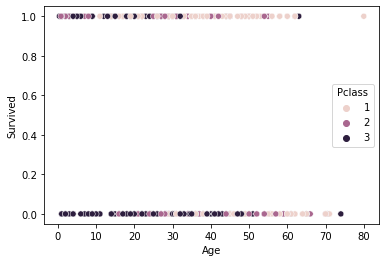

In [33]:
sns.scatterplot(x = "Age", y = "Survived", data = titanic, hue = "Pclass")

Now do the same for the columns 'Fare' and 'Survived'

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

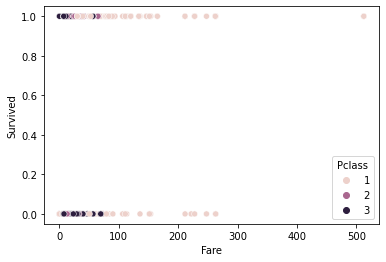

In [34]:
sns.scatterplot(x = "Fare", y = "Survived", data = titanic, hue = "Pclass")

# Is there any better visualization technique to handle binary data? If so, use it to try to understand the effect of Age in the variable Survived

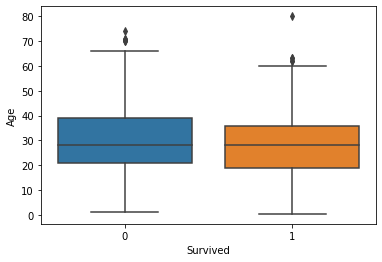

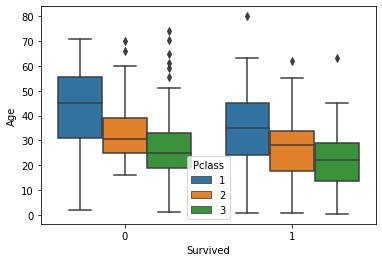

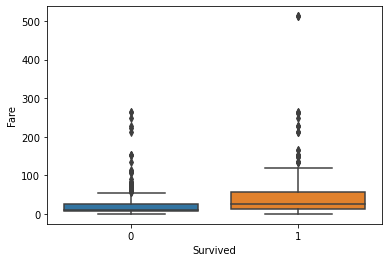

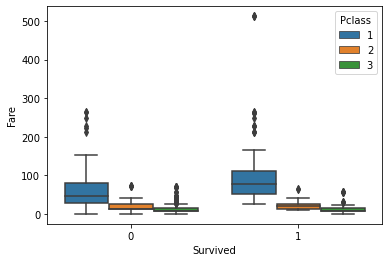

In [43]:
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.show()
sns.boxplot(x='Survived', y='Age', data=titanic, hue = 'Pclass')
plt.show()
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.show()
sns.boxplot(x = "Survived", y = "Fare", data = titanic, hue = "Pclass")
plt.show()

In [ ]:
sns.

# Cross Tab

Sometimes the plots above can reveal some important insights - specially if you have used some kind of, however, a better way to obtain these insights would be to use the `pd.crosstab()` 
function. Use it to explore the relations between `Age` and `Survived`. 

In [51]:
pd.crosstab(titanic["Age"],titanic["Survived"]).describe()

Survived,0,1
count,88.000000,88.000000
mean,4.795455,3.284091
std,4.966923,3.413795
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.500000,2.000000
75%,7.000000,5.000000
max,19.000000,15.000000


Now perform the same operation for `Pclass` and `Survived`

In [49]:
pd.crosstab(titanic["Pclass"],titanic["Survived"])

Survived,0,1
Pclass,,
1,79,136
2,97,87
3,371,118


What can you infer from that?

In [ ]:
#Pobres morrem mais, classe média é metade, ricos ficam vivos, principalmente se adulto jovem

# Correlations

Can you infer the same using a correlation table and a heatmap?

1. Correlation dataframe


In [53]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005043,-0.033977,0.037246,-0.058415,-0.004067,0.010695
Survived,-0.005043,1.000000,-0.341591,-0.076057,-0.034753,0.081625,0.257979
Pclass,-0.033977,-0.341591,1.000000,-0.366911,0.082493,0.018537,-0.550037
Age,0.037246,-0.076057,-0.366911,1.000000,-0.307659,-0.189090,0.095914
SibSp,-0.058415,-0.034753,0.082493,-0.307659,1.000000,0.414868,0.159698
Parch,-0.004067,0.081625,0.018537,-0.189090,0.414868,1.000000,0.215801
Fare,0.010695,0.257979,-0.550037,0.095914,0.159698,0.215801,1.000000


2. Correlation Heatmap

<AxesSubplot:>

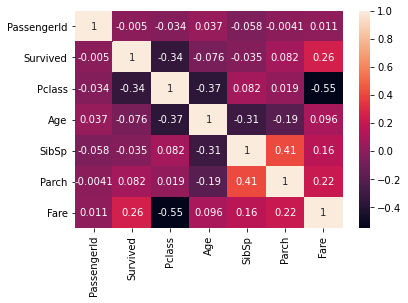

In [54]:
sns.heatmap(titanic.corr(),annot=True)

Do you think age is linearly related to the variable Survived? Do you think this variable will be important in our models?

In [ ]:
# Definitivamente não!

# Plot the distribution of the Age variable for each category of the `Survived` variable in the same plot. 

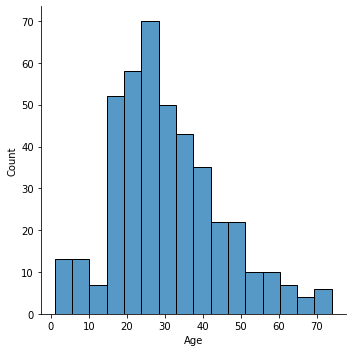

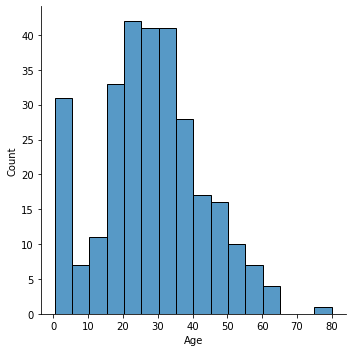

In [69]:
sns.displot(titanic.Age[titanic["Survived"]==0],label="Survived", kind = 'hist')
sns.displot(titanic.Age[titanic["Survived"]==1],label="Did not survive", kind = 'hist')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


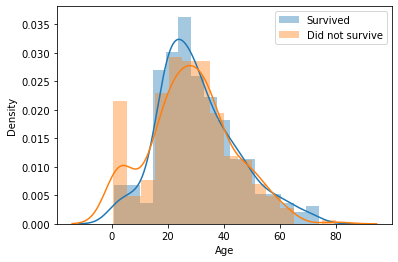

In [72]:

sns.distplot(titanic.Age[titanic["Survived"]==0],label="Survived")
sns.distplot(titanic.Age[titanic["Survived"]==1],label="Did not survive")
plt.legend()

# Now try to plot the same distribution but break the group into 
1. Survived, less than 18 years old male 
2. NOT Survived, less than 18 years old male 

And plot their `Age` distributions in the same graph.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 27.174314543282527)

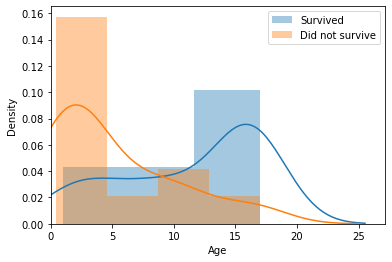

In [80]:
sns.distplot(titanic.Age[(titanic["Survived"]==0)&(titanic["Age"]<18)&(titanic["Sex"]=="male")],label="Survived")
sns.distplot(titanic.Age[(titanic["Survived"]==1)&(titanic["Age"]<18)&(titanic["Sex"]=="male")],label="Did not survive")
plt.legend()
plt.xlim(0)

Do you understand this graph? What can you conclude about the variable Age? Is it important now? How does this relate to `Age`'s linear correlation coefficient? 

In [ ]:
# pelo gênero tem alguma correlação

# For these groups above, calculate their average of survivalness.

You probably observed a discrimination of Surivavalness around 9 years old. For this exercise, you need to calculate the average of survivalness for each of these groups to survive. Again, filter the dataset into two subgroups:

1. Males with ages less than 9
2. Males with ages greater than 9 and less than 18

What are their average survival?

In [81]:
np.mean(titanic[(titanic["Sex"]=="male") & (titanic["Age"]<9)]["Survived"])

0.6071428571428571

In [82]:
np.mean(titanic[(titanic["Sex"]=="male") & (titanic["Age"]>9) & (titanic["Age"]<18)]["Survived"])

0.15384615384615385

In [84]:
male_child = (titanic['Sex'] == 'male') & (titanic["Age"]<9)
mean_male_child = titanic.loc[male_child, 'Survived'].mean()
mean_male_child

0.6071428571428571

In [89]:
male_teen = (titanic["Sex"]=="male") & (titanic["Age"]>9) & (titanic["Age"]<18)
mean_male_teen = titanic.loc[male_teen, 'Survived'].mean()
mean_male_teen

0.15384615384615385

*To think:* If you were told then, to predict if a 15 year old man have survived, what would you predict?

# Prepare data for our first model

### Let's start simple. 

First create a variable named `X` containing the variables `['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']`. 


In [90]:
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

Also create a pandas series containing the variable Survived. Store it in the variable `y`.

In [92]:
y = pd.DataFrame(titanic['Survived'])

# Dummify your dataset

Create a dummy version of your `X` dataset. After obtaining the dummification of your features, you'll observe that some  You won't need both of them, so you could use the argument `drop_first=True` to get rid of the first dummy.

In [94]:
dum = pd.get_dummies(X)
dum

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
5,3,NaN,0,0,8.4583,0,1,0,1,0
6,1,54.0,0,0,51.8625,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [95]:
dum = pd.get_dummies(X, drop_first=True)
dum

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
1,1,38.0,1,0,71.2833,0,0,0
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
5,3,NaN,0,0,8.4583,1,1,0
6,1,54.0,0,0,51.8625,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,NaN,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


# Prepare your validation strategy

We'll use the validation strategy called `holdout`. For this strategy, the idea is to hide part of your dataframe to estimate the error on a data you haven't seen before. 

So you'll be able to use part of your dataset to train your model and then use the never-seen part of your dataset to have a good estimate of the error when the model goes to production.

## Separate your `X` dataset into a dataset called `X_train` and another called `X_test`. Of course, also create a pandas series containing `y_train` and `y_test`. 

In [107]:
from sklearn.model_selection import train_test_split
a = X_train,X_test,y_train,y_test=train_test_split(dum,y)
a1 = pd.DataFrame(a[0])
a1

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
774,2,54.0,1,3,23.0000,0,0,1
756,3,28.0,0,0,7.7958,1,0,1
543,2,32.0,1,0,26.0000,1,0,1
92,1,46.0,1,0,61.1750,1,0,1
711,1,NaN,0,0,26.5500,1,0,1
...,...,...,...,...,...,...,...,...
213,2,30.0,0,0,13.0000,1,0,1
854,2,44.0,1,0,26.0000,0,0,1
476,2,34.0,1,0,21.0000,1,0,1
72,2,21.0,0,0,73.5000,1,0,1


In [108]:
a2 = pd.DataFrame(a[1])
a2

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
447,1,34.0,0,0,26.5500,1,0,1
248,1,37.0,1,1,52.5542,1,0,1
627,1,21.0,0,0,77.9583,0,0,1
490,3,NaN,1,0,19.9667,1,0,1
451,3,NaN,1,0,19.9667,1,0,1
...,...,...,...,...,...,...,...,...
762,3,20.0,0,0,7.2292,1,0,0
255,3,29.0,0,2,15.2458,0,0,0
548,3,33.0,1,1,20.5250,1,0,1
387,2,36.0,0,0,13.0000,0,0,1


# You'll be able to concat the `X_train` and `y_train`. Do the same for `X_test` and `y_test`. Put them into dataframes called `titanic_train` and `titanic_test`

In [109]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
774,2,54.0,1,3,23.0000,0,0,1
756,3,28.0,0,0,7.7958,1,0,1
543,2,32.0,1,0,26.0000,1,0,1
92,1,46.0,1,0,61.1750,1,0,1
711,1,NaN,0,0,26.5500,1,0,1
...,...,...,...,...,...,...,...,...
213,2,30.0,0,0,13.0000,1,0,1
854,2,44.0,1,0,26.0000,0,0,1
476,2,34.0,1,0,21.0000,1,0,1
72,2,21.0,0,0,73.5000,1,0,1


In [110]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
447,1,34.0,0,0,26.5500,1,0,1
248,1,37.0,1,1,52.5542,1,0,1
627,1,21.0,0,0,77.9583,0,0,1
490,3,NaN,1,0,19.9667,1,0,1
451,3,NaN,1,0,19.9667,1,0,1
...,...,...,...,...,...,...,...,...
762,3,20.0,0,0,7.2292,1,0,0
255,3,29.0,0,2,15.2458,0,0,0
548,3,33.0,1,1,20.5250,1,0,1
387,2,36.0,0,0,13.0000,0,0,1


In [111]:
y_train

,Survived
774,1
756,0
543,1
92,0
711,0
...,...
213,0
854,0
476,0
72,0


In [112]:
y_test

,Survived
447,1
248,1
627,1
490,0
451,0
...,...
762,1
255,1
548,0
387,1


In [113]:
titanic_train = pd.concat([X_train,y_train],axis=1)
titanic_test = pd.concat([X_test,y_test],axis=1)

# And store it on your own folder.

In [114]:
titanic_train.to_csv('titanic_train.csv')
titanic_test.to_csv('titanic_test.csv')